<a href="https://colab.research.google.com/github/abhishekbalawan/Data-science-projects/blob/main/Flipkart_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Scrapping data from flipkart review page
import requests
#Following is the URL for flipkart reviews on parker pen
URL = "https://www.flipkart.com/parker-beta-standard-grey-fountain-pen/product-reviews/itmf86zpphzyznkr?pid=PENF86ZPXZNZGZS8&lid=LSTPENF86ZPXZNZGZS8MS9AM6&marketplace=FLIPKART"
page = requests.get(URL)

In [3]:
#Using BeautifulSoup for web scrapping
import requests
from bs4 import BeautifulSoup
page = requests.get(URL)
mainSoup = BeautifulSoup(page.content, "html.parser")

In [4]:
#User reviews in flipkart's review page are stored in html tag 'div' having class name 't-ZTKy'
#Paging to different pages is done through href element with class id 'ge-49M'

#getting all the links to review pages and stroing in 'links'
links = mainSoup.find_all("a", class_="ge-49M") 
#list to store all reviews
flipkartSentiments=[]
#for loop iterates through all review pages and reads user reviews stored within div elements with class name 't-ZTKy'
for link in links:
    URL = 'https://www.flipkart.com'+link["href"]
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    links = soup.find_all("div", class_="t-ZTKy")
    for link in links:
         flipkartSentiments.append(link.text.replace('READ MORE','').strip())


In [5]:
flipkartSentiments

["Very good product for starters..Not very smooth..Needs a bit of tuning..Use with a good quality ink and if you are a Pro in fountain pen, then maybe you might get a good result..The flow is good..Fine nib is quite Fine..Some feathering on normal papers is seen..I found it good overall. Can't expect much at this range..It's a good pen for day to day writing..",
 'Pros: It is one of the best other excellent products in this price range from Flipkart. Thanks to the Seller & Flipkart as well.Con: NothingRecommend others to buy from Flipkart & from this trustworthy Seller.I thought it would be better to share something about this pen with image & how it helps troublefree writing.',
 'very nice pen works very well tanks for sending me with good prize flipcart',
 "Since local stores sell this pen for around 135-150 range it is better on flipkart since i got it for just 114/- .Quality product from parker...the ink flow at start isn't perfect but little tuning here and there with the nib make

In [7]:
import pandas as pd
Frame=pd.DataFrame(flipkartSentiments, columns = ["flipkartReviews"])

In [ ]:
Frame

,flipkartReviews
0,Very good product for starters..Not very smoot...
1,Pros: It is one of the best other excellent pr...
2,very nice pen works very well tanks for sendin...
3,Since local stores sell this pen for around 13...
4,"I have just started to use fountain ink pen, t..."
...,...
95,Very good product
96,Nice to write
97,Love it
98,Nice


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [9]:
# remove both the leading and the trailing characters
flipkartSentiments = [flipkartReviews.strip() for flipkartReviews in Frame.flipkartReviews] 
flipkartSentiments

["Very good product for starters..Not very smooth..Needs a bit of tuning..Use with a good quality ink and if you are a Pro in fountain pen, then maybe you might get a good result..The flow is good..Fine nib is quite Fine..Some feathering on normal papers is seen..I found it good overall. Can't expect much at this range..It's a good pen for day to day writing..",
 'Pros: It is one of the best other excellent products in this price range from Flipkart. Thanks to the Seller & Flipkart as well.Con: NothingRecommend others to buy from Flipkart & from this trustworthy Seller.I thought it would be better to share something about this pen with image & how it helps troublefree writing.',
 'very nice pen works very well tanks for sending me with good prize flipcart',
 "Since local stores sell this pen for around 135-150 range it is better on flipkart since i got it for just 114/- .Quality product from parker...the ink flow at start isn't perfect but little tuning here and there with the nib make

In [10]:
text = ' '.join(flipkartSentiments)
text

"Very good product for starters..Not very smooth..Needs a bit of tuning..Use with a good quality ink and if you are a Pro in fountain pen, then maybe you might get a good result..The flow is good..Fine nib is quite Fine..Some feathering on normal papers is seen..I found it good overall. Can't expect much at this range..It's a good pen for day to day writing.. Pros: It is one of the best other excellent products in this price range from Flipkart. Thanks to the Seller & Flipkart as well.Con: NothingRecommend others to buy from Flipkart & from this trustworthy Seller.I thought it would be better to share something about this pen with image & how it helps troublefree writing. very nice pen works very well tanks for sending me with good prize flipcart Since local stores sell this pen for around 135-150 range it is better on flipkart since i got it for just 114/- .Quality product from parker...the ink flow at start isn't perfect but little tuning here and there with the nib makes it a real c

In [11]:
##Part Of Speech Tagging
nlp = spacy.load('en')
one_block = text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [12]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Very ADV
good ADJ
product NOUN
for ADP
starters NOUN
.. PUNCT
Not PART
very ADV
smooth ADJ
.. PUNCT
Needs VERB
a DET
bit NOUN
of ADP
tuning NOUN
.. PUNCT
Use VERB
with ADP
a DET
good ADJ


In [13]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['product', 'starters', 'Needs', 'bit', 'tuning', 'Use', 'quality', 'ink', 'fountain', 'pen', 'might', 'result', 'flow', 'nib', 'feathering', 'papers', 'seen', 'found', 'Ca', 'expect', 'range', 'pen', 'day', 'day', 'writing', 'Pros', 'products', 'price', 'range', 'Thanks', 'Con', 'others', 'buy', 'thought', 'would', 'share', 'pen', 'image', 'helps', 'troublefree', 'writing', 'pen', 'works', 'tanks', 'sending', 'prize', 'stores', 'sell', 'pen', 'range', 'flipkart', 'got', 'product', 'ink', 'flow', 'start', 'tuning', 'makes', 'charm', 'right', 'bit', 'start', 'provides', 'feedback', 'paper', 'based', 'preference', 'looking', 'fountain', 'pen', 'pleasure', 'price', 'range', 'would', 'say', 'started', 'use', 'fountain', 'ink', 'pen', 'one', 'rs', 'pen', 'term', 'writing', 'price', 'worth', 'product', 'gifted', 'pen', 'father', 'purchase', 'look', 'look', 'fountain', 'pen', 'difference', 'compare', 'product', 'wrinting', 'product', 'thise', 'people', 'write', 'patients', 'thats', 'pen', 'pr

In [14]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,pen,38
1,product,18
2,ink,11
3,writing,7
4,fountain,5
5,price,5
6,range,4
7,buy,4
8,bit,3
9,use,3


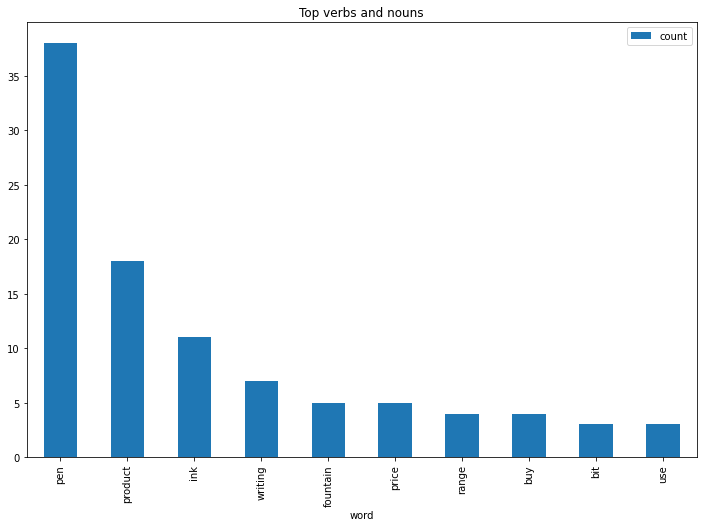

In [15]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [16]:
#Uploading Afinn file for sentiment analysis
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [17]:
import io
book = pd.read_csv(io.BytesIO(uploaded['Afinn.csv']),encoding='cp1252',error_bad_lines=False)
book

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
#Tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(flipkartSentiments))
sentences[5:15]

['I have just started to use fountain ink pen, this one is my first only.',
 'Pen is good but even a 15 rs pen is same or even better in term of writing.',
 'An this price it does not worth it.',
 'Excellent product.',
 'I gifted this pen to my father and he is so happy with it!',
 'I am very happy with this purchase.',
 'look wise great look..but this is my first fountain pen so there is some difference as we compare to normal nib...this product is not good for fast wrinting..this product is good for thise people who write with patients..thats all.. Really  nice pen.',
 'excellent product...smooth writing pen...no issues...go for it.. Parker is Parker not peter!',
 'good for giving as gift Very good value for money.',
 'Very Good.']

In [20]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Very good product for starters..Not very smoot...
1,Can't expect much at this range..It's a good p...
2,Thanks to the Seller & Flipkart as well.Con: N...
3,very nice pen works very well tanks for sendin...
4,If you are looking for a pure fountain pen ple...
5,"I have just started to use fountain ink pen, t..."
6,Pen is good but even a 15 rs pen is same or ev...
7,An this price it does not worth it.
8,Excellent product.
9,I gifted this pen to my father and he is so ha...


In [21]:
affinity_scores = book.set_index('word')['value'].to_dict()

In [22]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [23]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [24]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [25]:
sent_df['index']=range(0,len(sent_df))

In [26]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     50
1     30
2     38
3     85
4     23
5     15
6     18
7      8
8      2
9     14
10     7
11    42
12    12
13    10
14     2
15    14
16     2
17     8
18     4
19    18
20    15
21    17
22     7
23     6
24     3
25     4
26     1
27    13
28    16
29     2
30     4
31     6
32    21
33    56
34     6
35     9
36    17
37    24
38     2
39    43
40     4
41     3
42    11
43    26
44     4
45    23
46    51
47    29
Name: word_count, dtype: int64

In [27]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,index,word_count
44,Awesome Always likage problem.,-2,44,4
29,Very dissatisfied.,-2,29,2
36,It is very light in weight and ink may leak if...,-1,36,17
45,Don't buy this pen Very bad item always leakin...,-1,45,23
15,but color shown in the picture (red) is differ...,-1,15,14
23,Cheap plastic barrel and steel nib.,0,23,6
40,Also very thik writing.,0,40,4
34,Both Cartridge and Ink converter provided.,0,34,6
31,Even when ink cartridge was full.,0,31,6
30,Didn't even write once.,0,30,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


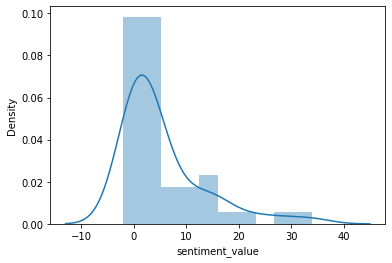

In [28]:
#Plotting using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

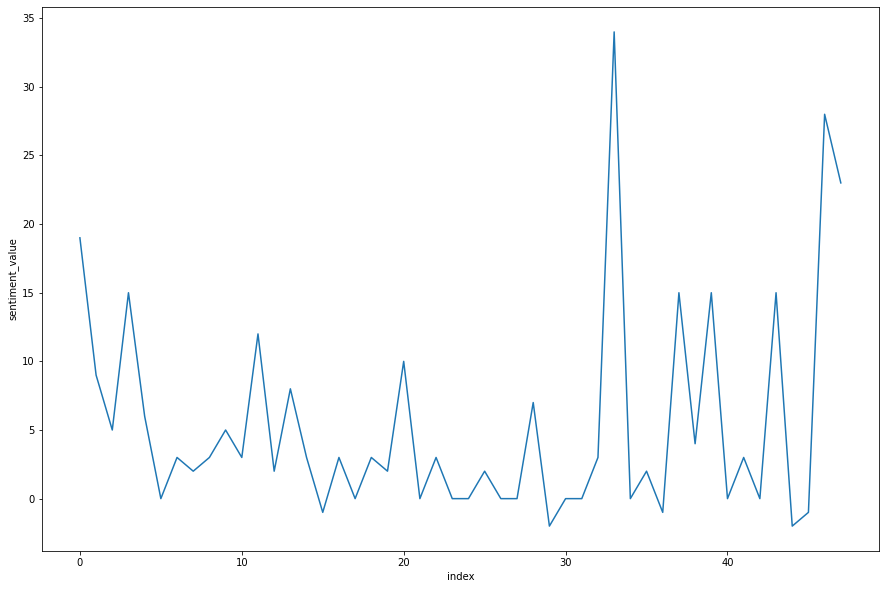

In [29]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

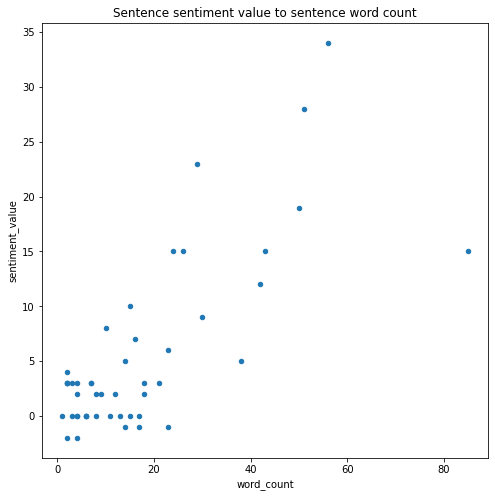

In [30]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')